### Home_work 4
Motahare Hazrati<br/>
ID: 400206613<br/>


In [59]:
from google.colab import drive
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM,Dense,RepeatVector,Input


Dataframe is being read <br/>
Padding is done here

In [60]:

data = pd.read_csv('ferdousi.txt', delimiter = "\n", names=["text", 'label'])
data['label'] = 'ferdousi'
index=np.arange((len(data)/2)-2)
data=data['text']

In [79]:
def plot_history(history,name):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle(name, fontsize=30)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

   
   
   


In [62]:
    Mesra1=data[range(0, len(data), 2)]
    Mesra1=Mesra1.iloc[1:]
    Mesra1=Mesra1.iloc[:-1]
    Mesra1=Mesra1.reset_index(drop=True)
    Mesra2=data[range(1, len(data), 2)]
    Mesra2=Mesra2.iloc[1:]
    Mesra2=Mesra2.reset_index(drop=True)
   
   

list to string

In [63]:
    for i in range(len(Mesra1)):
        Mesra1[i] = ''.join(Mesra1[i])

    for i in range(len(Mesra2)):
        Mesra2[i] = ''.join(Mesra2[i])


In [64]:
lengg=max(len(max(Mesra1, key=len)),len(max(Mesra2, key=len)))
lengg


34

padding

In [65]:

    for i in range(len(Mesra1)):
        Mesra1[i]=Mesra1[i].rjust(lengg, 'P')
        Mesra1[i]=list(Mesra1[i])
        Mesra1[i].insert(0,'_BOM_')
        Mesra1[i].append('_EOM_')



    for i in range(len(Mesra2)):

        Mesra2[i]=Mesra2[i].rjust(lengg, 'P')
        Mesra2[i]=list(Mesra2[i])
        Mesra2[i].insert(0,'_BOM_')
        Mesra2[i].append('_EOM_')

10% of the whole data is seprated for final test<br/> 
actually dataset is divided into 80% train, 10% validation and 10% test 

In [66]:
# 10 percent of data is separated for test dataset
testidx=np.random.choice(index,size=int(0.1*49600),replace=0)
trainidx=list(set(index)-set(testidx))

data: All Ferdousi poems<br/>
data0: dataset of first Mesra of all Beyts<br/>
data1: dataset of secound Mesra of all Beyts<br/>

maximum length of all Mesras after padding is 37

In [67]:
lengg_after_pad=max(len(max(Mesra1, key=len)),len(max(Mesra2, key=len)))
lengg_after_pad


36

EMBEDDING 

In [ ]:
word = pd.read_csv('farsi_literature_word2vec_model.txt', delimiter = "\n", )
df = pd.read_csv("farsi_literature_word2vec_model.txt")
words = []
embedding = []
for j in range(39778):
    a1 = list(df.iloc[j])
    c1 = 0
    for i in a1[0]:
        c1 += 1
        if i == ' ':
            break
    words.append(a1[0][0:c1-1])
    a2 = [float(x) for x in a1[0][c1:].split()]
    embedding.append(a2)

In [68]:


numm=''.join(np.ravel(data))
charSet=set(numm)
charSet=charSet.difference({'\n'})
padSet={'P','_BOM_','_EOM_'}
charSet=charSet.union(padSet)

data=np.asarray(data)
charList=list(charSet)
dicSize=len(charList)

charVec=np.eye((dicSize))


Mesra1train=Mesra1[trainidx]
Mesra2train=Mesra2[trainidx]
Mesra1test=Mesra1[testidx]
Mesra2test=Mesra2[testidx]

Mesra1train=Mesra1train.reset_index(drop=True)
Mesra2train=Mesra2train.reset_index(drop=True)
Mesra1test=Mesra1test.reset_index(drop=True)
Mesra2test=Mesra2test.reset_index(drop=True)

# Defining the inputs and outputs of network
x_train = np.zeros((len(Mesra1train), lengg_after_pad, dicSize))
y_train = np.zeros((len(Mesra2train), lengg_after_pad, dicSize))
y_train_shifted = np.zeros((len(Mesra2train), lengg_after_pad, dicSize))

x_test = np.zeros((len(Mesra1test), lengg_after_pad, dicSize))
y_test = np.zeros((len(Mesra2test), lengg_after_pad, dicSize))
ytest_sh = np.zeros((len(Mesra2test), lengg_after_pad, dicSize))



In [69]:

Mesra1test

0       [_BOM_, P, P, P, P, P, P, P, P, P, P, P, P, ب,...
1       [_BOM_, P, P, P, P, P, P, P, P, P, P, P, ب, ف,...
2       [_BOM_, P, P, P, P, P, ه, م, ی,  , ر, ا, ن, د,...
3       [_BOM_, P, P, P, P, P, P, P, P, د, و,  , ل, ش,...
4       [_BOM_, P, P, P, P, P, P, P, P, P, P, ا, گ, ر,...
                              ...                        
4955    [_BOM_, P, P, P, P, P, P, P, P, P, د, ل,  , ق,...
4956    [_BOM_, P, P, P, P, P, P, P, P, P, P, ب, ی, ا,...
4957    [_BOM_, P, P, P, P, P, P, P, ب, ه,  , ن, ا, م,...
4958    [_BOM_, P, P, P, P, P, P, P, P, P, P, P, س, ی,...
4959    [_BOM_, P, P, P, P, P, P, P, P, P, P, P, P, ز,...
Name: text, Length: 4960, dtype: object

In [70]:
def one_hot_coder(mySeq, myDic):
    vector=np.zeros(shape=(len(mySeq),dicSize))
    for i in range(len(mySeq)):
      currentChar=mySeq[i]
      idx=myDic.index(currentChar)
      vector[i,:]=charVec[idx,:]
    return vector


for i in range(len(Mesra1train)-1):
  x_train[i,:,:]=one_hot_coder(Mesra1train[i],charList)
  y_train[i,:,:]=one_hot_coder(Mesra2train[i],charList)
  a=one_hot_coder(Mesra2train[i],charList)
  y_train_shifted[i,1:,:]=a[0:-1]


for i in range(len(Mesra1test)-1):
  x_test[i,:,:]=one_hot_coder(Mesra1test[i],charList)
  y_test[i,:,:]=one_hot_coder(Mesra2test[i],charList)
  a=one_hot_coder(Mesra2test[i],charList)
  ytest_sh[i,1:,:]=a[0:-1]

### Encoder-Decoder using LSTM

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
157/157 [==============================] - 7s 31ms/step - loss: 1.8890 - accuracy: 0.4749 - val_loss: 1.5944 - val_accuracy: 0.5432
Epoch 2/20
157/157 [==============================] - 4s 28ms/step - loss: 1.4881 - accuracy: 0.5730 - val_loss: 1.3904 - val_accuracy: 0.5966
Epoch 3/20
157/157 [==============================] - 4s 25ms/step - loss: 1.3207 - accuracy: 0.6189 - val_loss: 1.2792 - val_accuracy: 0.6277
Epoch 4/20
157/157 [==============================] - 4s 26ms/step - loss: 1.2192 - accuracy: 0.6483 - val_loss: 1.1976 - val_accuracy: 0.6537
Epoch 5/20
157/157 [==============================] - 4s 28ms/step - loss: 1.1476 - accuracy: 0.6680 - val_loss: 1.1306 - val_accuracy: 0.6727
Epoch 6/20
157/157 [==============================] - 4s 26ms/step - loss: 1.0871 - accuracy: 0.6847 - val_loss: 1.0869 - val_accuracy: 0.6854
Epoch 7/20
157/157 [==============================] - 4s 26ms/step - loss: 1.0430 - accuracy: 0.6969 - val_loss: 1.0589 - val_accuracy: 0.6930

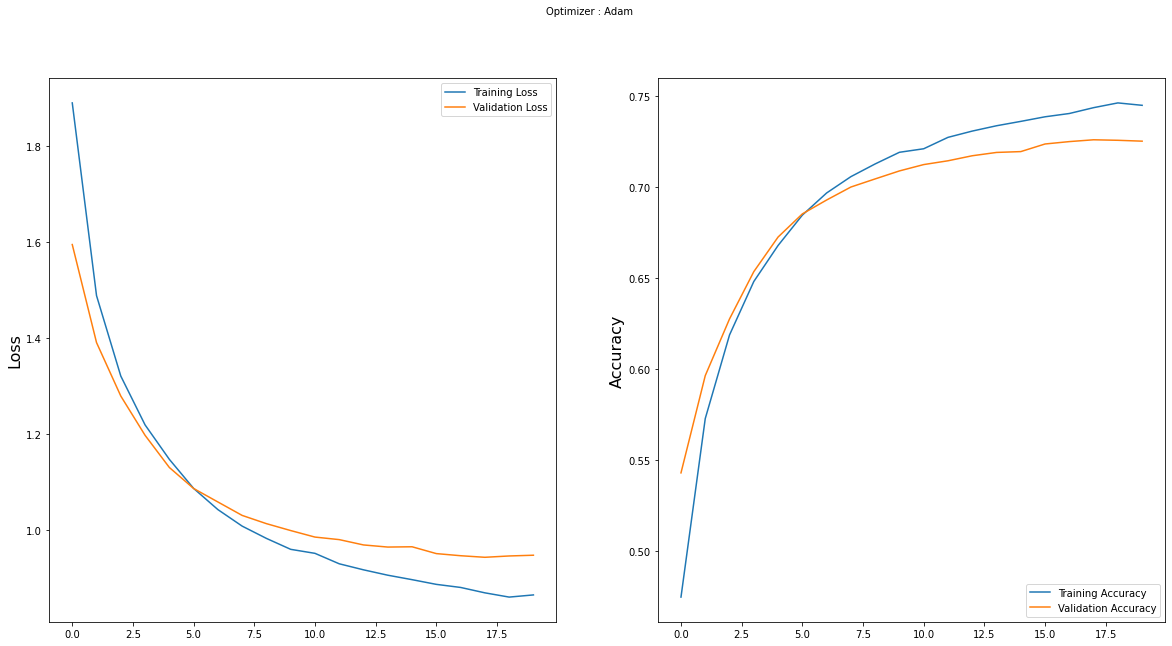

In [72]:


x_train=x_train.astype(int)
y_train=y_train.astype(int)
y_train_shifted=y_train_shifted.astype(int)

# Hyperparameters
batch=256
lstm_out=256
epochs=20
lr=0.01


encoder_inputs = Input(shape=(None, dicSize),name='Encoder_Inputs')
decoder_inputs = Input(shape=(None, dicSize),name='Decoder_Inputs')


encoder_lstm = LSTM(lstm_out, return_state=True,name='LSTM_Encoder',activation='tanh',recurrent_activation='sigmoid')
_,hidden_state, cell_state = encoder_lstm(encoder_inputs)
decoder_initial_states = [hidden_state, cell_state]
decoder_lstm = LSTM(lstm_out, return_sequences=True, return_state=True,name='LSTM_Decoder',activation='tanh',recurrent_activation='sigmoid')
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=decoder_initial_states)
decoder_dense = Dense(dicSize, activation='softmax',name='Dense_Layer')
decoder_outputs = decoder_dense(decoder_outputs)

# Training
opt=keras.optimizers.Adam(lr=lr)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
history=model.fit([x_train, y_train_shifted], y_train,batch_size=batch,epochs=epochs,verbose=1,validation_split=0.1)



plot_history(history,'LSTM')



# Model evaluation using testdataset

In [73]:

model.evaluate([x_test,ytest_sh],y_test)


155/155 [==============================] - 2s 5ms/step - loss: 0.9155 - accuracy: 0.7349


[0.9155328273773193, 0.7349238395690918]

### Encoder-Decoder using GRU

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
157/157 [==============================] - 7s 28ms/step - loss: 1.7997 - accuracy: 0.5013 - val_loss: 1.4759 - val_accuracy: 0.5750
Epoch 2/20
157/157 [==============================] - 4s 25ms/step - loss: 1.3463 - accuracy: 0.6127 - val_loss: 1.2433 - val_accuracy: 0.6412
Epoch 3/20
157/157 [==============================] - 4s 23ms/step - loss: 1.1707 - accuracy: 0.6604 - val_loss: 1.1442 - val_accuracy: 0.6687
Epoch 4/20
157/157 [==============================] - 4s 23ms/step - loss: 1.0880 - accuracy: 0.6828 - val_loss: 1.1048 - val_accuracy: 0.6790
Epoch 5/20
157/157 [==============================] - 4s 25ms/step - loss: 1.0453 - accuracy: 0.6937 - val_loss: 1.0860 - val_accuracy: 0.6828
Epoch 6/20
157/157 [==============================] - 4s 24ms/step - loss: 1.0160 - accuracy: 0.7014 - val_loss: 1.0573 - val_accuracy: 0.6923
Epoch 7/20
157/157 [==============================] - 4s 23ms/step - loss: 0.9977 - accuracy: 0.7062 - val_loss: 1.0530 - val_accuracy: 0.6935

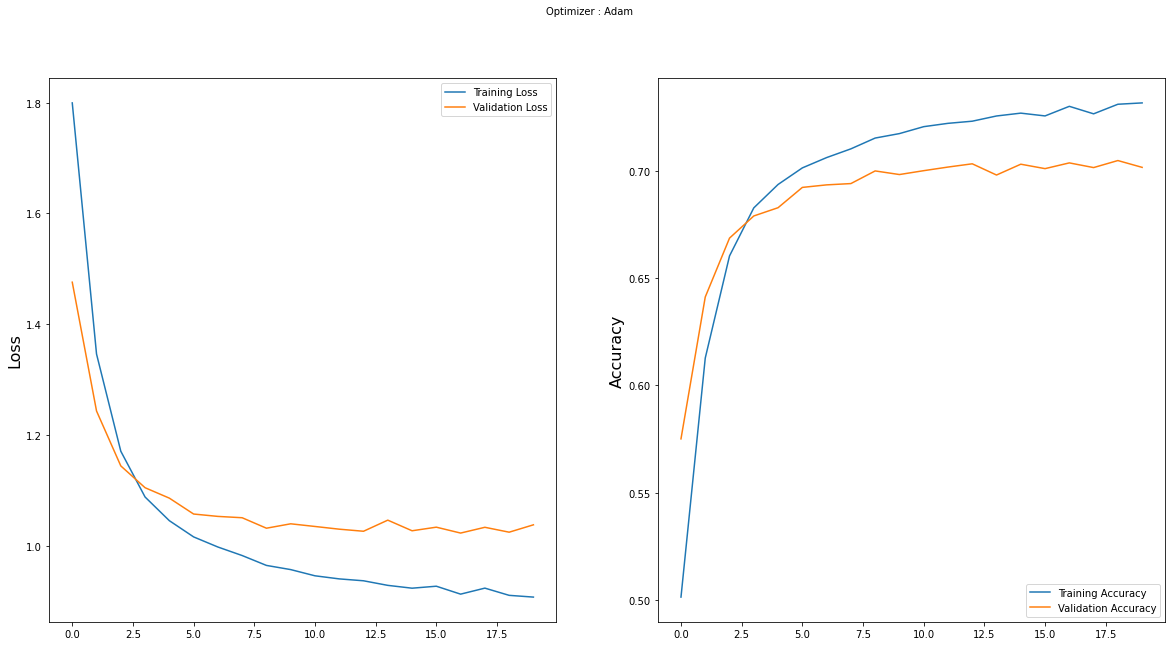

In [75]:


# Hyperparameters
batch=256
lstm_out=256
epochs=20
lr=0.01

# Network Architecture
# Inputs of network
encoder_inputs = Input(shape=(None, dicSize),name='Encoder_Inputs')
decoder_inputs = Input(shape=(None, dicSize),name='Decoder_Inputs')

# Encoder LSTM
encoder = GRU(lstm_out, return_state=True)
_,hidden_state = encoder(encoder_inputs)
decoder_initial_states = [hidden_state]
decoder = GRU(lstm_out, return_sequences=True)
decoder_outputs = decoder(decoder_inputs,initial_state=decoder_initial_states)
decoder_dense = Dense(dicSize, activation='softmax',name='Dense_Layer')
decoder_outputs = decoder_dense(decoder_outputs)

# Training
opt=keras.optimizers.Adam(lr=lr)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
history=model.fit([x_train, y_train_shifted], y_train,batch_size=batch,epochs=epochs,verbose=1,validation_split=0.1)


plot_history(history,'GRU')



### Model evaluation using testdataset

In [76]:
model.evaluate([x_test,ytest_sh],y_test)


155/155 [==============================] - 1s 5ms/step - loss: 0.9985 - accuracy: 0.7114


[0.9984613060951233, 0.7114023566246033]